# Exploration base Prophet

## Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('../raw_data/stock_prices_latest.csv', nrows=100000)

In [3]:
df

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.7500,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.8500,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.1700,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.5600,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.5100,42.25,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...
99995,ACIW,2012-10-02,41.20,42.20,41.1700,42.20,14.0667,385000,1.0
99996,ACIW,2010-06-10,18.60,19.15,18.4906,19.13,6.3767,183200,1.0
99997,ACIW,2000-07-26,18.31,19.00,18.0000,18.69,6.2300,148600,1.0
99998,ACIW,2013-06-26,45.58,45.78,44.9300,45.01,15.0033,192700,1.0


In [101]:
is_MSFT = df['symbol']=='MSFT'
df_msft = df[is_MSFT]

In [5]:
df2 = df_msft[['date', 'close_adjusted']].copy()
df2

,date,close_adjusted
0,2016-05-16,49.7013
1,2002-01-16,22.5902
2,2001-09-18,18.0802
3,2007-10-26,27.2232
4,2014-06-27,38.6773
...,...,...
4539,2017-10-24,78.4629
4540,2001-02-01,20.7629
4541,2011-02-01,23.2219
4542,2016-03-30,52.7890


In [6]:
df2.columns = ['ds','y']
df2['ds'] = pd.to_datetime(df2['ds'])
df2.sort_values(by=['ds'], inplace=True)
df2.head()

,ds,y
604,2000-01-03,38.7965
2681,2000-01-04,37.4851
1192,2000-01-05,37.8812
3000,2000-01-06,36.6130
1050,2000-01-07,37.0923


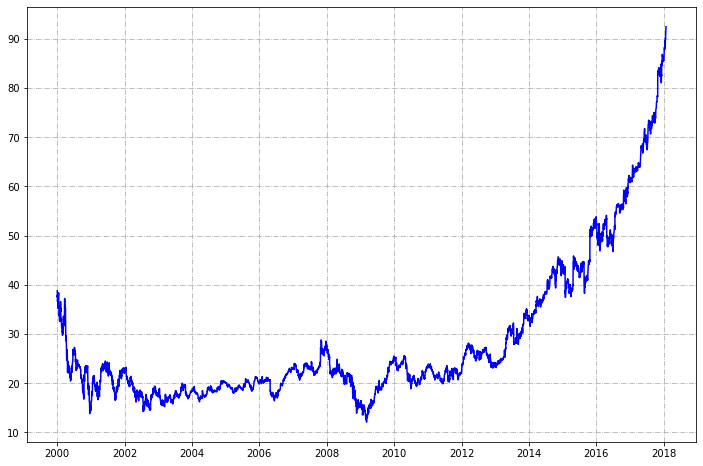

In [7]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(df2['ds'], df2['y'], 'b')
plt.show()

## Premier modèle sur toutes les données microsoft

In [8]:
model = NeuralProphet()
metrics = model.fit(df2, validate_each_epoch=True, freq="D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 17


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[17/17]: 100%|██████████| 17/17 [00:03<00:00,  5.18it/s, SmoothL1Loss=0.0081, MAE=1.85, RegLoss=0, MAE_val=17, SmoothL1Loss_val=0.438]   


In [9]:
future = model.make_future_dataframe(df2, periods=7, n_historic_predictions=len(df2))

forecast = model.predict(future)

Text(0.5, 1.0, 'Microsft Stocks')

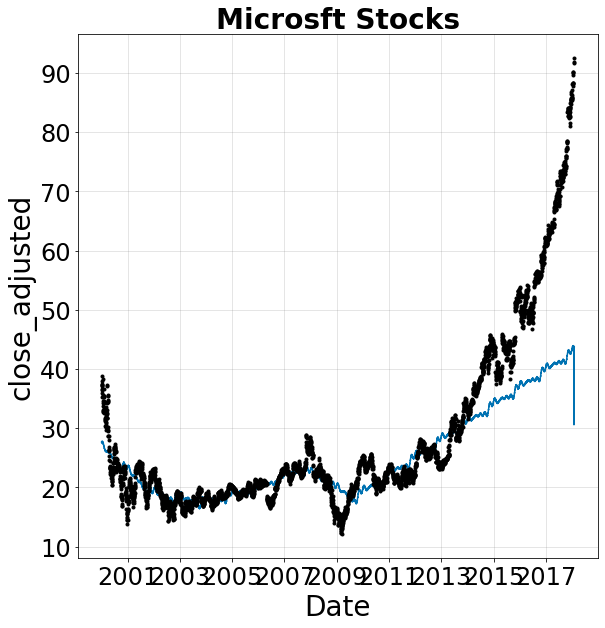

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
model.plot(forecast, xlabel="Date", ylabel="close_adjusted", ax=ax)

ax.xaxis.label.set_size(28)
ax.yaxis.label.set_size(28)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_title("Microsft Stocks", fontsize=28, fontweight="bold")

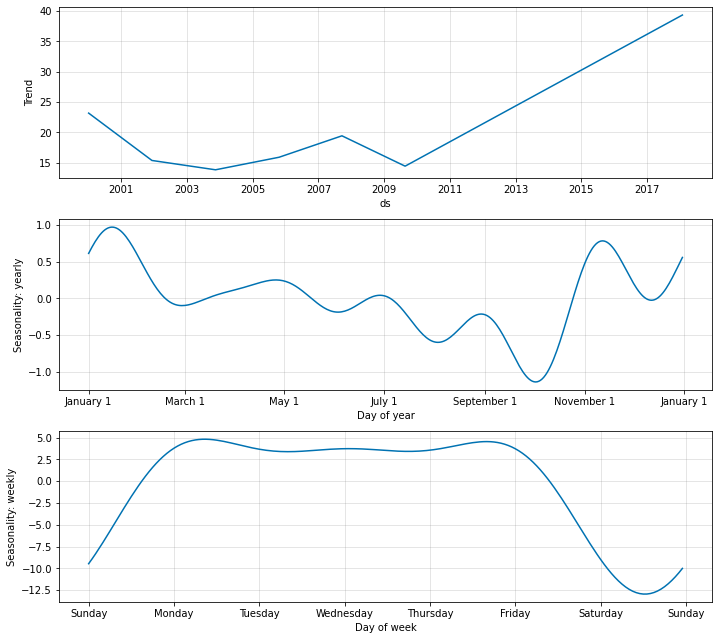

In [11]:
fig_comp = model.plot_components(forecast)

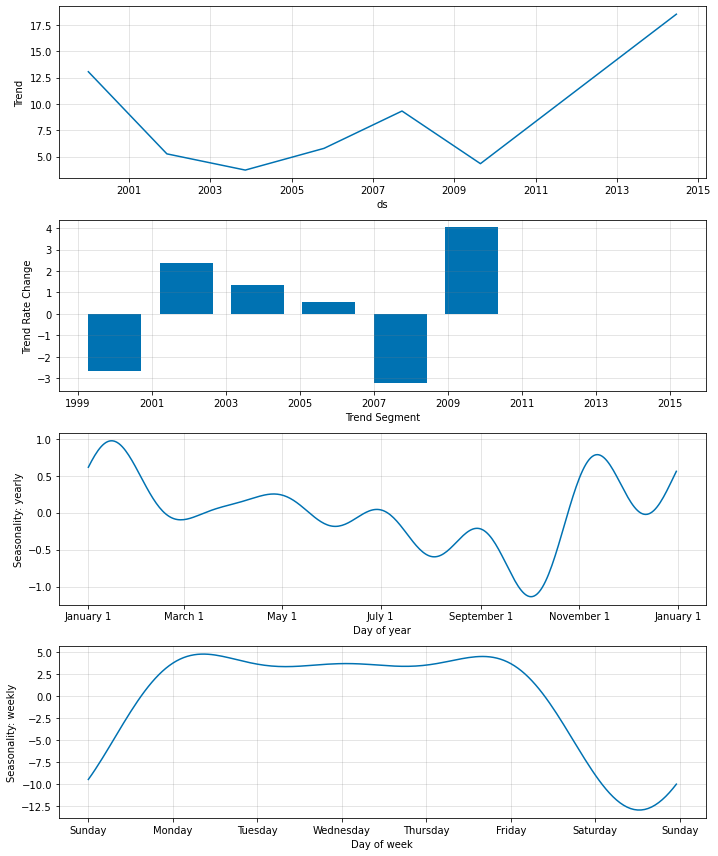

In [12]:
fig_param = model.plot_parameters()

Text(0.5, 1.0, 'Model Loss (MAE)')

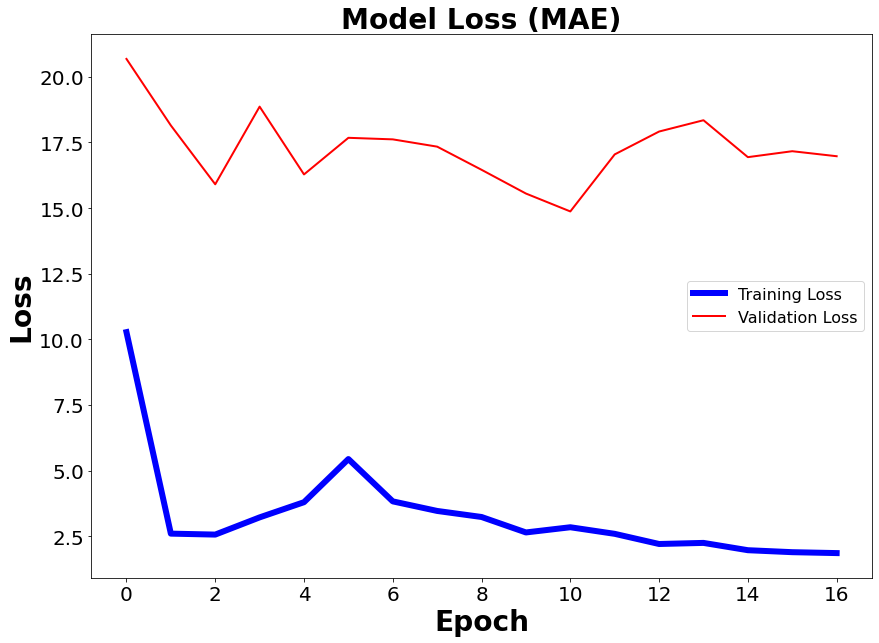

In [13]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], '-b', linewidth=6, label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

# You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28, fontweight="bold")
ax.set_ylabel("Loss", fontsize=28, fontweight="bold")

ax.set_title("Model Loss (MAE)", fontsize=28, fontweight="bold")

## Analyse 2016-2018

In [14]:
df2

,ds,y
604,2000-01-03,38.7965
2681,2000-01-04,37.4851
1192,2000-01-05,37.8812
3000,2000-01-06,36.6130
1050,2000-01-07,37.0923
...,...,...
575,2018-01-18,90.1000
904,2018-01-19,90.0000
2740,2018-01-22,91.6100
3647,2018-01-23,91.9000


In [15]:
df3 = df2[(df2['ds'] > '2016-01-01') & (df2['ds'] < '2018-01-01')]
df3

,ds,y
3457,2016-01-04,52.1816
2472,2016-01-05,52.4197
1106,2016-01-06,51.4674
4092,2016-01-07,49.6773
2140,2016-01-08,49.8296
...,...,...
3473,2017-12-22,85.5100
2167,2017-12-26,85.4000
22,2017-12-27,85.7100
564,2017-12-28,85.7200


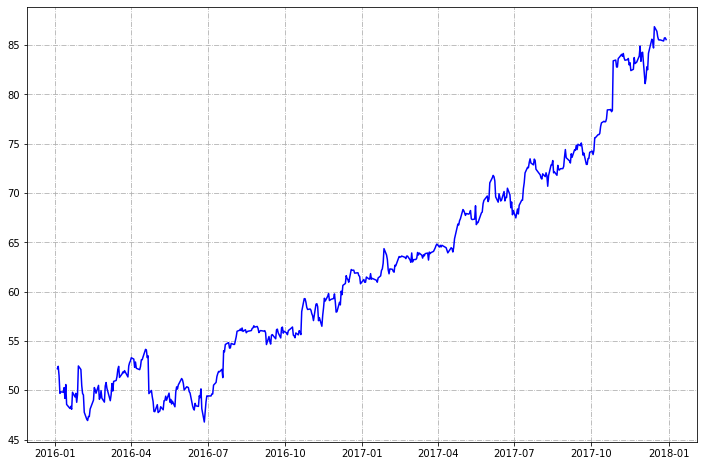

In [16]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(df3['ds'], df3['y'], 'b')
plt.show()

In [17]:
model = NeuralProphet()
metrics = model.fit(df3, validate_each_epoch=True, freq="D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 79


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E+00
Epoch[79/79]: 100%|██████████| 79/79 [00:04<00:00, 17.25it/s, SmoothL1Loss=0.00114, MAE=1.07, RegLoss=0, MAE_val=3.14, SmoothL1Loss_val=0.0109] 


In [18]:
future = model.make_future_dataframe(df3, periods=3, n_historic_predictions=len(df3))

forecast = model.predict(future)

Text(0.5, 1.0, 'Microsft Stocks')

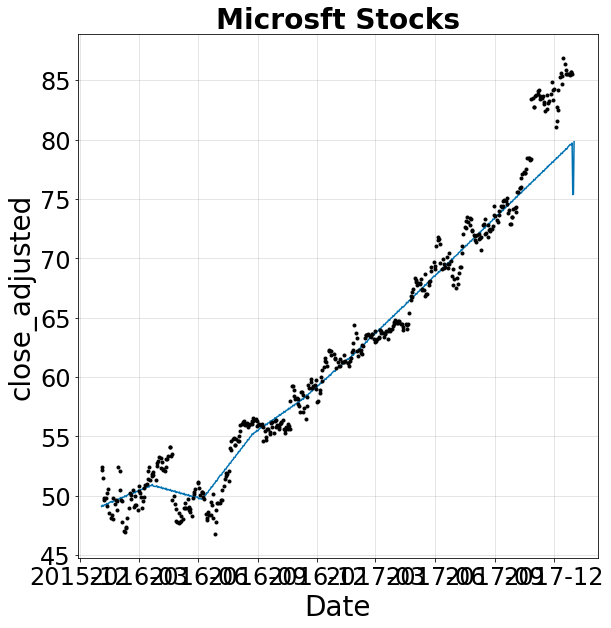

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
model.plot(forecast, xlabel="Date", ylabel="close_adjusted", ax=ax)

ax.xaxis.label.set_size(28)
ax.yaxis.label.set_size(28)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_title("Microsft Stocks", fontsize=28, fontweight="bold")

Text(0.5, 1.0, 'Model Loss (MAE)')

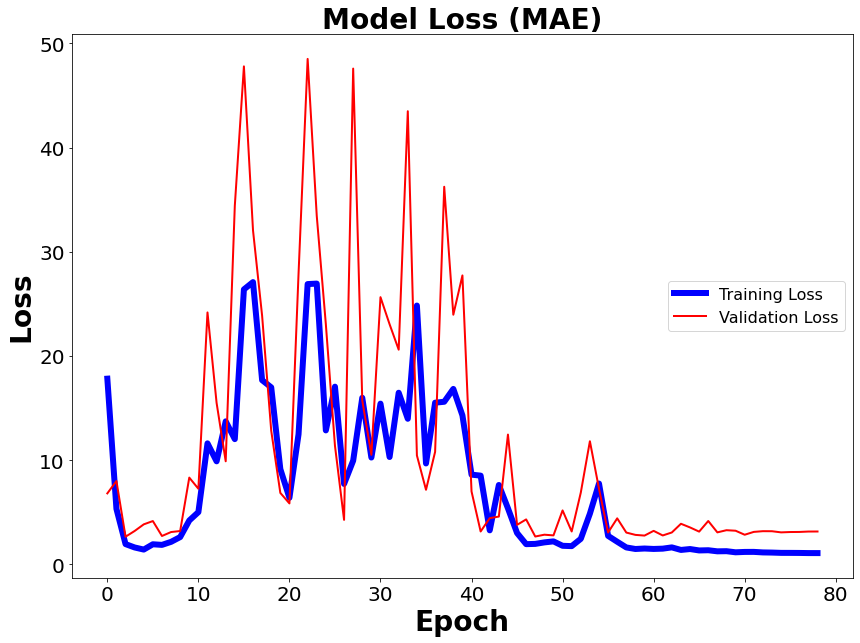

In [20]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], '-b', linewidth=6, label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

# You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28, fontweight="bold")
ax.set_ylabel("Loss", fontsize=28, fontweight="bold")

ax.set_title("Model Loss (MAE)", fontsize=28, fontweight="bold")

# Test ARIMA

In [102]:
df_msft

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.8300,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.8700,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.3200,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.0300,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.2500,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...
4539,MSFT,2017-10-24,78.90,79.20,78.46,78.8600,78.4629,16613928,1.0
4540,MSFT,2001-02-01,60.81,62.63,60.38,62.3800,20.7629,35896400,1.0
4541,MSFT,2011-02-01,27.80,28.06,27.61,27.9925,23.2219,62810700,1.0
4542,MSFT,2016-03-30,54.93,55.64,54.90,55.0500,52.7890,23008260,1.0


In [103]:
df_msft = df_msft.set_index('date')

In [104]:
df_msft

,symbol,open,high,low,close,close_adjusted,volume,split_coefficient
date,,,,,,,,
2016-05-16,MSFT,50.80,51.96,50.75,51.8300,49.7013,20032017,1.0
2002-01-16,MSFT,68.85,69.84,67.85,67.8700,22.5902,30977700,1.0
2001-09-18,MSFT,53.41,55.00,53.17,54.3200,18.0802,41591300,1.0
2007-10-26,MSFT,36.01,36.03,34.56,35.0300,27.2232,288121200,1.0
2014-06-27,MSFT,41.61,42.29,41.51,42.2500,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...
2017-10-24,MSFT,78.90,79.20,78.46,78.8600,78.4629,16613928,1.0
2001-02-01,MSFT,60.81,62.63,60.38,62.3800,20.7629,35896400,1.0
2011-02-01,MSFT,27.80,28.06,27.61,27.9925,23.2219,62810700,1.0


In [121]:
df_msft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 2017-01-03 to 2018-01-24
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   close_adjusted  267 non-null    float64
dtypes: float64(1)
memory usage: 12.3+ KB


In [105]:
df_msft.sort_index(inplace=True)

In [106]:
df_msft = df_msft[["close_adjusted"]]

<AxesSubplot:xlabel='date'>

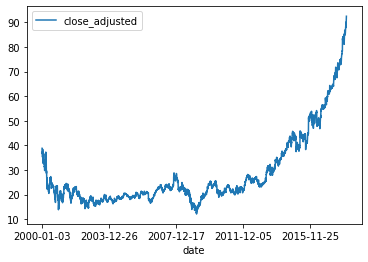

In [107]:
df_msft.plot()

In [108]:
df_msft = df_msft.loc['2017-01-01':'2019-01-01']

In [120]:
df_msft

,close_adjusted
date,
2017-01-03,61.2191
2017-01-04,60.9452
2017-01-05,60.9452
2017-01-06,61.4735
2017-01-09,61.2778
...,...
2018-01-18,90.1000
2018-01-19,90.0000
2018-01-22,91.6100


In [119]:
df_msft.date=pd.to_datetime(df_msft.date, format = '%d/%m/%y') 

AttributeError: 'DataFrame' object has no attribute 'date'

In [110]:
y = df_msft.close_adjusted
y

date
2017-01-03    61.2191
2017-01-04    60.9452
2017-01-05    60.9452
2017-01-06    61.4735
2017-01-09    61.2778
               ...   
2018-01-18    90.1000
2018-01-19    90.0000
2018-01-22    91.6100
2018-01-23    91.9000
2018-01-24    92.4900
Name: close_adjusted, Length: 267, dtype: float64

In [111]:
from statsmodels.tsa.stattools import adfuller
print('p-value: ', adfuller(y)[1])

p-value:  0.9943814385399474


In [112]:
print('p-value: ', adfuller(y.diff(1).fillna(0))[1])

p-value:  2.6126950594984655e-30


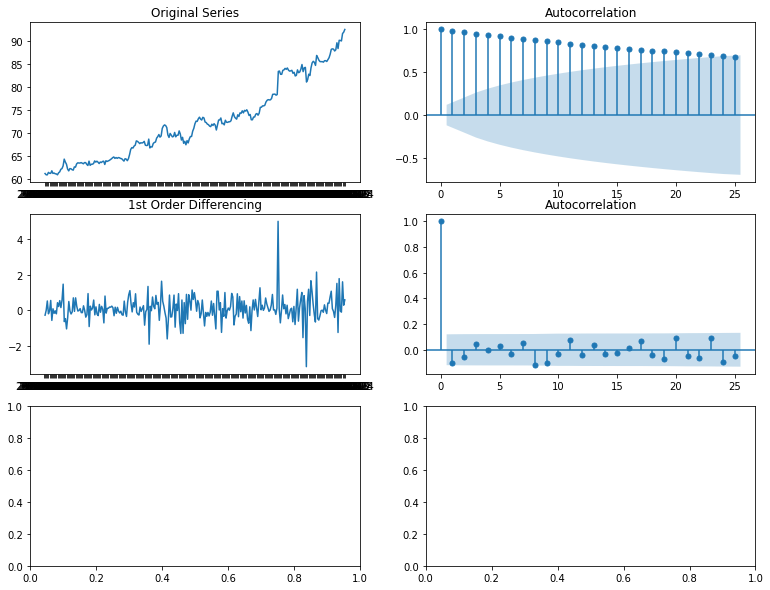

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(13,10))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), ax=axes[1, 1])

plt.show()

In [114]:
y_diff = y.diff().dropna()

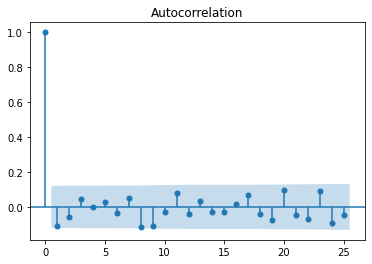

In [115]:
plot_acf(y_diff);

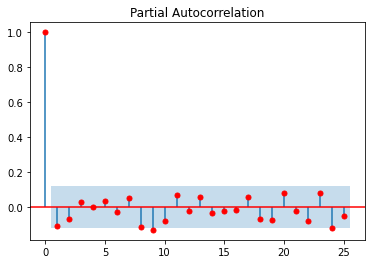

In [116]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(y_diff, c='r');

In [117]:
from statsmodels.tsa.arima.model import ARIMA

# 1. initialize the model
arima = ARIMA(y, order=(1, 1, 1))

# 2. fit the models
arima = arima.fit()

arima.summary()

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         close_adjusted   No. Observations:                  267
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -284.792
Date:                Tue, 08 Jun 2021   AIC                            575.583
Time:                        16:58:07   BIC                            586.334
Sample:                             0   HQIC                           579.902
                                - 267                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0657      0.774      0.085      0.932      -1.451       1.582
ma.L1         -0.1445      0.770     -0.188      0.851      -1.654       1.365
sigma2         0.4983      0.018     28.346      0.000       0.464       0.533
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              1235.03
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               4.42   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
# Actual vs Fitted
arima.plot_predict(dynamic=False);

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [93]:
arima.predict(start=450, end=519, dynamic=True);

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
